In [2]:
from solcore import si, material
from solcore.structure import Layer, Structure
import solcore.quantum_mechanics as QM
import solcore.poisson_drift_diffusion as PDD
from solcore.structure import Layer, Junction, TunnelJunction
from solcore.solar_cell import SolarCell
from solcore.solar_cell_solver import solar_cell_solver
from solcore.light_source import LightSource
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T =293
# First we create the materials we need
bulk = material("GaAs")(T=293, strained=False)
barrier = material("GaAsP")(T=293, P=0.1, strained=True)
QW = material("InGaAs")(T=293, In=0.15, strained=True)
wl = np.linspace(350, 1050, 301) * 1e-9

# As well as some of the layers
top_layer = Layer(width=si("30nm"), material=barrier)
inter = Layer(width=si("3nm"), material=bulk)
well_layer = Layer(width=si("7nm"), material=QW)
barrier_layer = Layer(width=si("5nm"), material=barrier)
bottom_layer = top_layer

InSb = material('InSb')(T=293, strained=True)
GaSb = material('GaSb')(T=293, strained=True)
buffer = material('AlGaAs')(T=293, Al=0.3)
capping = material('GaAs')(T=293)
n_GaAs = material('GaAs')(T=293, Nd=1e14)
p_GaAs = material('GaAs')(T=293, Na=1e14)
# We create the QW material at the given composition
n_layer = Layer(width=250e-9, material=n_GaAs)
QW1 = Layer(width=5e-9, material=InSb)
Capping_layer = Layer(width=80e-9, material=capping)
QW2 = Layer(width=5e-9, material=GaSb)
p_layer = Layer(width=400e-9, material=p_GaAs)
test_ver1 = Structure([n_layer, QW1, Capping_layer, QW2, p_layer], substrate=bulk)
test_ver2 = Structure([n_layer, QW1, Capping_layer, p_layer], substrate=bulk)
light_source = LightSource(
    source_type="standard",
    version="AM1.5g",
    x=wl,
    output_units="photon_flux_per_m",
    concentration=1,
)



Solving QW properties...
Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!

...done!

Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
Processing structure...
...done!

Solving equilibrium...
...done!
...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
Processing structure...
...done!

Solving equilibrium...
...done!
...done!

...done!

Solvi

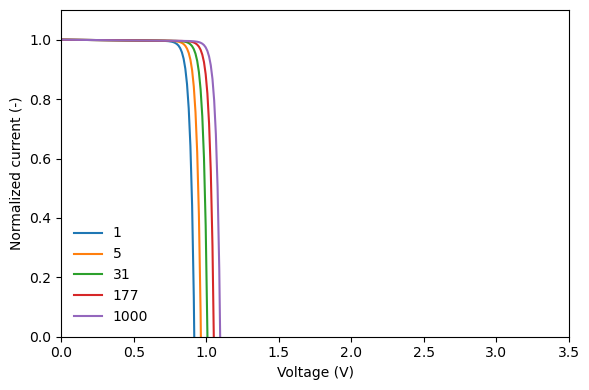

In [4]:
layers = 30
T = 298
wl = np.linspace(350, 1050, 301) * 1e-9

# First, we create the materials of the QW
# สร้างวัสดุทำรับQW ในsolar cell
QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
Bmat = material("GaAsP")(T=T, P=0.1, strained=True)
i_GaAs = material("GaAs")(T=T)
i_GaAs_dope = material("GaAs")(T=T, Na= 1e14)

# The QW is 7 nm wide, with GaAs interlayers 2 nm thick at each side and GaAsP barriers
# 10 nm thick. The final device will have 30 of these QWs.
# กำหนดโครงสร้างของwellให้มี3ชั้น 1ใช่GaAsP เป็น barrier 2ใช้internsic GaAs เป็นinterlayers 3 ใช้ InGaAs เป็นwell
QW = PDD.QWunit(
    [
        Layer(width=2e-9, material=Bmat, role="barrier"),
        Layer(width=1e-9, material=i_GaAs_dope, role="well"),
        Layer(width=4e-9, material=QWmat, role="well"),
        Layer(width=1e-9, material=i_GaAs_dope, role="well"),
        Layer(width=2e-9, material=Bmat, role="barrier")
    ],
    T=T,
    repeat=layers, #สร้างมา30ชั้นเอาไว้กันฝน
    substrate=i_GaAs, #ใช้intrensic GaAs เป็นฐาน
)

# We solve the quantum properties of the QW, leaving the default values of all
# parameters
QW_list = QW.GetEffectiveQW(wavelengths=wl) #optimic ให้QW ดีขึ้น(ไม่แน่ใจทำยังไง)เท่าที่เข้าใจคือมันปรับstrain ในband และปรับค่า absorption
#แบบ่ว่าเบิ่้มแต่ไม่รู้หลักการเท่าไร

# Materials for the BOTTOM junction
# ทำส่วนล่าง
window_bottom = material("GaInP")(T=T, Nd=5e24, In=0.49)
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
bsf_bottom = material("GaInP")(T=T, Na=5e24, In=0.49)

# If you want to test the code without QWs, to make ti a bit faster, comment the line
# with QW_list ประกอบร่างให้กับsolar cell
GaAs_junction = Junction(
    [
        # Layer(width=10e-9, material=window_bottom, role="Window"),#ชั้นบน
        Layer(width=150e-9, material=n_GaAs, role="Emitter"),
        Layer(width=2e-9, material=Bmat, role="barrier")
    ]
    # Comment the following line to remove the QWs
    + QW_list
    + [
        Layer(width=2e-9, material=Bmat, role="barrier"),
        Layer(width=2000e-9, material=p_GaAs, role="Base"),
        # Layer(width=200e-9, material=bsf_bottom, role="BSF"),#ชั้นล่าง

    ],
    sn=1e6,
    sp=1e6,
    T=T,
    kind="PDD",
)
# Materials for the TOP junction
window_top = material("AlInP")(T=T, Nd=5e23, Al=0.53, electron_mobility=0.01, hole_mobility=7e-4)
n_GaInP = material("GaInP")(T=T, Nd=5e23, In=0.49)
p_GaInP = material("GaInP")(T=T, Na=8e22, In=0.49)
bsf_top = material("AlInP")(T=T, Na=5e23, Al=0.53, electron_mobility=0.01, hole_mobility=7e-4)
# And the materials needed for the anti reflecting coating
MgF2 = material("MgF2")()
ZnS = material("ZnScub")()

# Finally, we put everithing together to make a solar cell
my_solar_cell = SolarCell(
    [
        Layer(width=110e-9, material=MgF2, role="ARC1"),
        Layer(width=60e-9, material=ZnS, role="ARC2"),
        GaAs_junction,
    ],
    T=T,
    substrate=n_GaAs,
)
light_source = LightSource(
    source_type="standard",
    version="AM1.5g",
    x=wl,
    output_units="photon_flux_per_m",
    concentration=1,
)

# The definitions are all done, so we just start solving the properties,
# starting with the QE. We calculate the QE curve under illumination
# สร้างเสร็จแล้วก็แก้สมการได้เย้ๆ งงอะไรคือQE(ใช่่ quantum efficiency หรือป่าว)
solar_cell_solver(my_solar_cell,"qe",
                  user_options={"light_source": light_source,
                                "wavelength": wl,
                                "optics_method": "TMM",
                                },)

# And now, the IV curves under various concentration levels.
# NOTE: Due to the presence of QWs and the fact we calculate things a 19 different
# concentrations, this might take a while (~4 hours).
# Remove the QWs as indicated above to test the code much faster.

num_con = 5 #จำนวนในการสร้างแสง
con = np.logspace(0, 3, num_con)
vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-3.5, 0, 300)

allI = []
isc = []
voc = []
FF = []
pmpp = []

fig3, axIV = plt.subplots(1, 1, figsize=(6, 4))
for c in con:#ทำการยิงแสงทั้งหมด20ครั้งตามcon
    light_source.concentration = c
    solar_cell_solver(
        my_solar_cell,#วัสดุ
        "iv",#วัดIV
        user_options={
            "light_source": light_source,
            "wavelength": wl,
            "optics_method": None,#ไม่คำนึงถึงการตกกระทบทางแสงหรือเข้า100%ไม่แน่ใจ
            "light_iv": True,#ให่IV ออกมา
            "mpp": True,#ให้Mppออกมา
            "voltages": V,#ให้Vออกมา
            "internal_voltages": vint,#ไม่แน่ใจอะไรคือVintเป็นbulid in หรือป่าวเท้าที่เห็นเป็นVoc
        },
    )

    isc.append(my_solar_cell.iv["Isc"]) #นำค่าIscที่ได้มาในแต่ละความเข้มแสงมาเก็บไว้
    voc.append(my_solar_cell.iv["Voc"]) #นำค่าVocที่ได้มานั้นมาเก็บ
    FF.append(my_solar_cell.iv["FF"])   #FF(Isc*Vsc/Pmpp)
    pmpp.append(my_solar_cell.iv["Pmpp"])#Pmpp power maximum power peak
    allI.append(my_solar_cell.iv["IV"][1])#ไม่แ่นใจ่ว่าทำไมต้อง1แต่คิดว่า0น่าจะเป็นแรงดันต้องลองรันในspyder(ลองดูสมบัติของmy_solar_vell.iv['IV][1]

    # outpath = "C:\\Users\\usuwa\\Desktop\\senior_project\\simulation_solar_cell"
    # fname = f'light_conc_{c}.pkl'
    # with open(outpath+'\\'+fname,'wb') as fout:
    #     pickle.save(my_solar_cell,fout)

    # And now, everything is plotting...
    axIV.plot(-V, my_solar_cell.iv["IV"][1] / isc[-1], label=int(c))#เป็นการวัดลักษณะIVเมิอแสงเปลี่ยนไป
    print('======================================================================')
    print(f'{pow(10,c)} / 5')
    print('======================================================================')
    
axIV.legend(loc="lower left", frameon=False)
axIV.set_ylim(0, 1.1)
axIV.set_xlim(0, 3.5)
axIV.set_xlabel("Voltage (V)")
axIV.set_ylabel("Normalized current (-)")

plt.tight_layout()



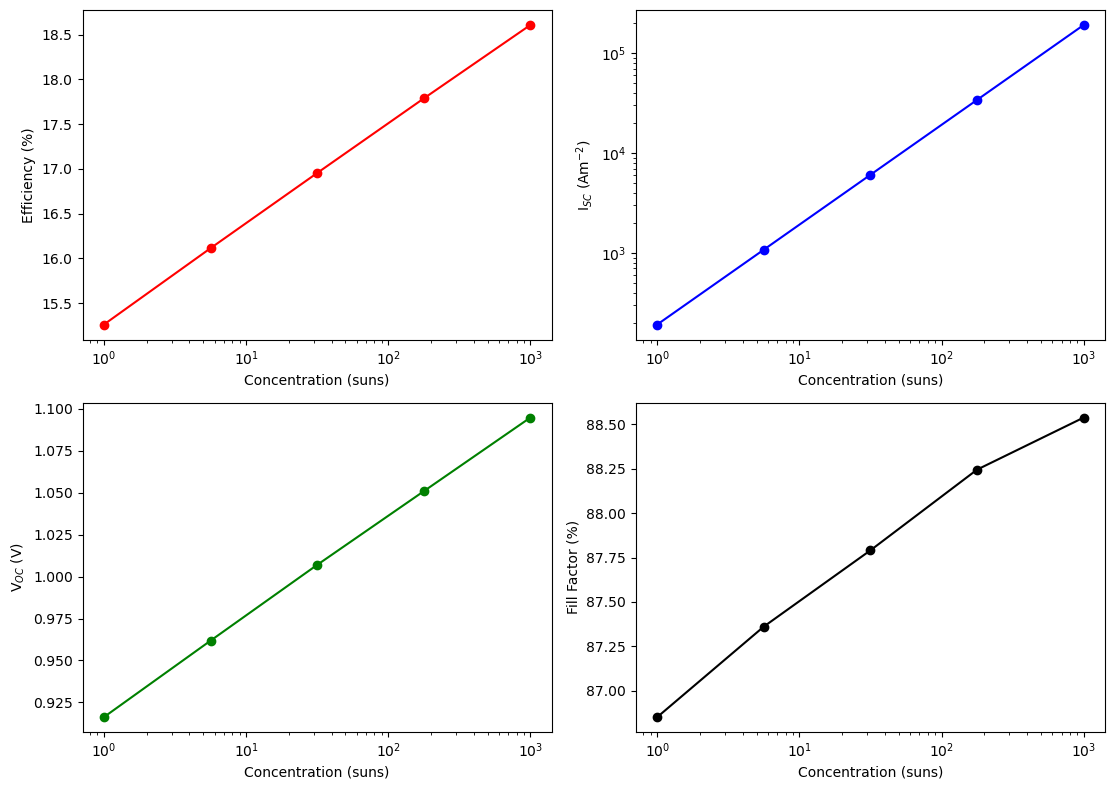

In [5]:
fig2, axes = plt.subplots(2, 2, figsize=(11.25, 8))

axes[0, 0].semilogx(con, np.array(pmpp) / con / 10, "r-o") #ทำไมต้องหาร10ด้วยไม่เข้าใจเลย(ไม่ใช้หารด้วย 0.97หรอเพราะว่าAM1.5g = 970w/m^2)แล้วทำไมไม่x100
axes[0, 0].set_xlabel("Concentration (suns)")
axes[0, 0].set_ylabel("Efficiency (%)")

axes[0, 1].loglog(con, abs(np.array(isc)), "b-o")
axes[0, 1].set_xlabel("Concentration (suns)")
axes[0, 1].set_ylabel("I$_{SC}$ (Am$^{-2}$)")

axes[1, 0].semilogx(con, abs(np.array(voc)), "g-o")
axes[1, 0].set_xlabel("Concentration (suns)")
axes[1, 0].set_ylabel("V$_{OC}$ (V)")

axes[1, 1].semilogx(con, abs(np.array(FF)) * 100, "k-o")
axes[1, 1].set_xlabel("Concentration (suns)")
axes[1, 1].set_ylabel("Fill Factor (%)")

plt.tight_layout()

# We can plot the electron and hole densities in equilibrium and at short circuit


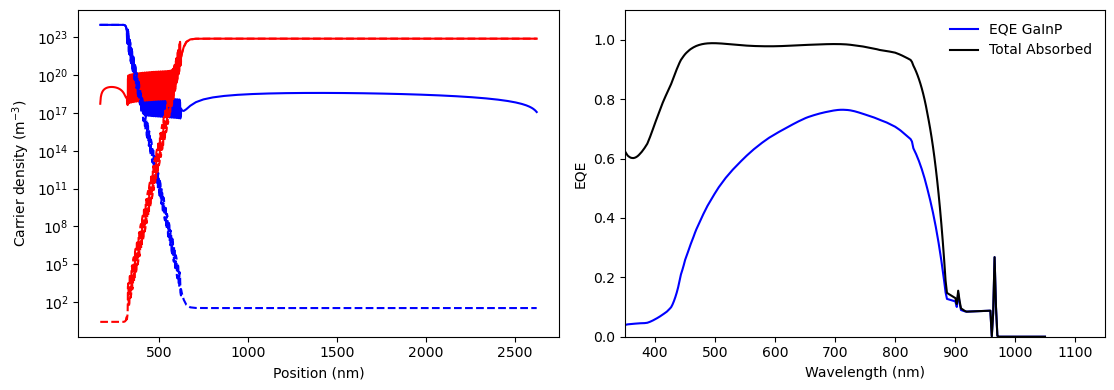

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11.25, 4))
for j in my_solar_cell.junction_indices:#junctionคือหยั่ง
    zz = (
            my_solar_cell[j].short_circuit_data.Bandstructure["x"] + my_solar_cell[j].offset)
    n = my_solar_cell[j].short_circuit_data.Bandstructure["n"]
    p = my_solar_cell[j].short_circuit_data.Bandstructure["p"]
    ax1.semilogy(zz * 1e9, n, "b")#อันนี้น่าจะเป็นการระบุcarrier densityของตอนฉายแสงของe และhole
    ax1.semilogy(zz * 1e9, p, "r")

    zz = my_solar_cell[j].equilibrium_data.Bandstructure["x"] + my_solar_cell[j].offset
    n = my_solar_cell[j].equilibrium_data.Bandstructure["n"]
    p = my_solar_cell[j].equilibrium_data.Bandstructure["p"]
    ax1.semilogy(zz * 1e9, n, "b--")#อันนี้น่าจะเป็นการระบุcarrier densityของตอนปิดแสงของe และhole
    ax1.semilogy(zz * 1e9, p, "r--")

ax1.set_xlabel("Position (nm)")
ax1.set_ylabel("Carrier density (m$^{-3}$)")
plt.tight_layout()

# And we plot the QE
labels = ["EQE GaInP", "EQE GaAs"]
colours = ["b", "r"]
for i, j in enumerate(my_solar_cell.junction_indices):#เป็นการพล็อตของeqeของแต่ละอันของGaAs และGaInP
    ax2.plot(wl * 1e9, my_solar_cell[j].eqe(wl), colours[i], label=labels[i])

ax2.plot(wl * 1e9, my_solar_cell.absorbed, "k", label="Total Absorbed")

ax2.legend(loc="upper right", frameon=False)
ax2.set_xlabel("Wavelength (nm)")
ax2.set_ylabel("EQE")
ax2.set_ylim(0, 1.1)
ax2.set_xlim(350, 1150)

plt.tight_layout()

In [7]:
fig3.savefig(f'IV_curve_QW_{layers}_layers.svg', dpi=300)
fig2.savefig(f'performance_QW_{layers}_layers.svg', dpi=300)
fig.savefig(f'EQE_QW_{layers}_layers.svg', dpi=300)



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001FBEF927600> (for post_execute):



KeyboardInterrupt



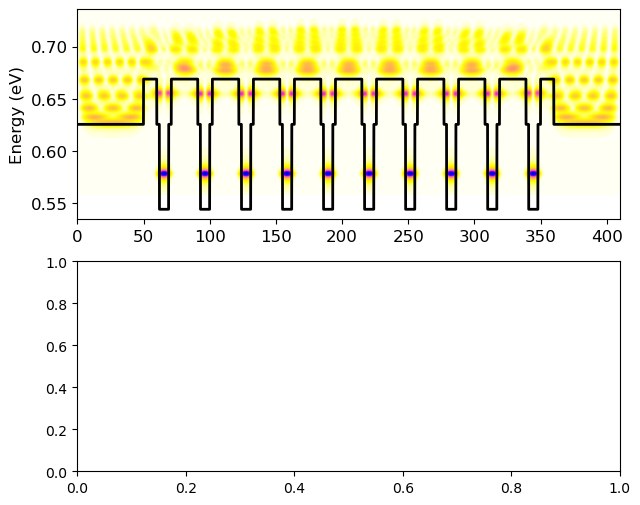

In [3]:
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
Bmat = material("GaAsP")(T=T, P=0.1, strained=True)
i_GaAs = material("GaAs")(T=T)
struc = Structure([Layer(width=50e-9, material=n_GaAs, role="Emitter")]
                  + 10 * [Layer(width=10e-9, material=Bmat, role="barrier"),
                          Layer(width=2e-9, material=i_GaAs, role="well"),
                          Layer(width=7e-9, material=QWmat, role="well"),
                          Layer(width=2e-9, material=i_GaAs, role="well"),
                          Layer(width=10e-9, material=Bmat, role="barrier")] +
                  [Layer(width=50e-9, material=p_GaAs, role="Base")],
                  substrate=i_GaAs)
output_2 = QM.schrodinger(struc, quasiconfined=0.05, graphtype='potentialsLDOS', num_eigenvalues=200, show=True)


In [ ]:
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
Bmat = material("GaAsP")(T=T, P=0.1, strained=True)
i_GaAs = material("GaAs")(T=T)
QW = PDD.QWunit(
    [
        Layer(width=10e-9, material=Bmat, role="barrier"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=7e-9, material=QWmat, role="well"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=10e-9, material=Bmat, role="barrier"),
    ],
    T=T,
    repeat=10, #สร้างมา30ชั้นเอาไว้กันฝน
    substrate=i_GaAs, #ใช้intrensic GaAs เป็นฐาน
)
QW_list = QW.GetEffectiveQW(wavelengths=wl)
# for i in QW_list:
#     print(i)
GaAs_junction = Junction(
    [Layer(width=150e-9, material=n_GaAs, role="Emitter"),]
    # Comment the following line to remove the QWs
    + QW_list
    + [Layer(width=2000e-9, material=p_GaAs, role="Base"),],
    sn=1e6,
    sp=1e6,
    T=T,
    kind="PDD",)
MgF2 = material("MgF2")()
ZnS = material("ZnScub")()
my_solar_cell1 = SolarCell(
    [
        Layer(width=110e-9, material=MgF2, role="ARC1"),
        Layer(width=60e-9, material=ZnS, role="ARC2"),
        GaAs_junction,
    ],
    T=T,
    substrate=n_GaAs,
)
solar_cell_solver(my_solar_cell1,"qe",
                  user_options={"light_source": light_source,
                                "wavelength": wl,
                                "optics_method": "TMM",
                                },)
vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-3.5, 0, 300)

solar_cell_solver(
    my_solar_cell1,#วัสดุ
    "iv",#วัดIV
    user_options={
        "light_source": light_source,
        "wavelength": wl,
        "optics_method": None,#ไม่คำนึงถึงการตกกระทบทางแสงหรือเข้า100%ไม่แน่ใจ
        "light_iv": True,#ให่IV ออกมา
        "mpp": True,#ให้Mppออกมา
        "voltages": V,#ให้Vออกมา
        "internal_voltages": vint,#ไม่แน่ใจอะไรคือVintเป็นbulid in หรือป่าวเท้าที่เห็นเป็นVoc
    },
)

plt.plot(-V, my_solar_cell1.iv["IV"][1]/1e2, label='test1')
plt.xlim(0,2)
plt.ylim(0,1e-2)


Solving QW properties...
Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...


In [1]:
plt.plot(-V, my_solar_cell1.iv["IV"][1]/1e2, label='test1')
plt.xlim(0,2)
plt.ylim(0,1.1e-2)

NameError: name 'plt' is not defined

Solving QW properties...
Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!

...done!

Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


(0.0, 0.001)

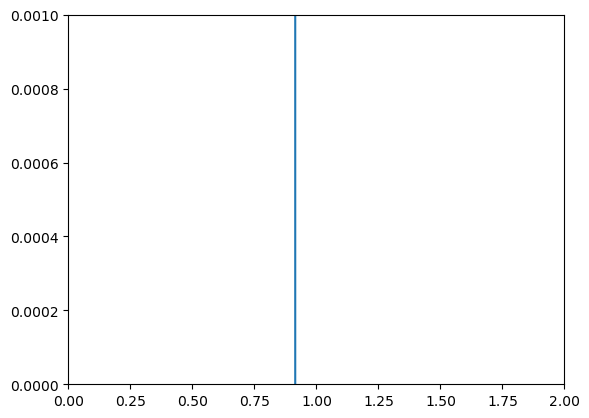

In [4]:
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
Bmat = material("GaAsP")(T=T, P=0.1, strained=True)
i_GaAs = material("GaAs")(T=T)
QW = PDD.QWunit(
    [
        Layer(width=10e-9, material=Bmat, role="barrier"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=7e-9, material=QWmat, role="well"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=10e-9, material=Bmat, role="barrier"),
    ],
    T=T,
    repeat=20, #สร้างมา30ชั้นเอาไว้กันฝน
    substrate=i_GaAs, #ใช้intrensic GaAs เป็นฐาน
)
QW_list = QW.GetEffectiveQW(wavelengths=wl)
# for i in QW_list:
#     print(i)
GaAs_junction = Junction(
    [Layer(width=150e-9, material=n_GaAs, role="Emitter"),]
    # Comment the following line to remove the QWs
    + QW_list
    + [Layer(width=2000e-9, material=p_GaAs, role="Base"),],
    sn=1e6,
    sp=1e6,
    T=T,
    kind="PDD",)
MgF2 = material("MgF2")()
ZnS = material("ZnScub")()
my_solar_cell2 = SolarCell(
    [
        Layer(width=110e-9, material=MgF2, role="ARC1"),
        Layer(width=60e-9, material=ZnS, role="ARC2"),
        GaAs_junction,
    ],
    T=T,
    substrate=n_GaAs,
)
solar_cell_solver(my_solar_cell2,"qe",
                  user_options={"light_source": light_source,
                                "wavelength": wl,
                                "optics_method": "TMM",
                                },)
vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-3.5, 0, 300)

solar_cell_solver(
    my_solar_cell2,#วัสดุ
    "iv",#วัดIV
    user_options={
        "light_source": light_source,
        "wavelength": wl,
        "optics_method": None,#ไม่คำนึงถึงการตกกระทบทางแสงหรือเข้า100%ไม่แน่ใจ
        "light_iv": True,#ให่IV ออกมา
        "mpp": True,#ให้Mppออกมา
        "voltages": V,#ให้Vออกมา
        "internal_voltages": vint,#ไม่แน่ใจอะไรคือVintเป็นbulid in หรือป่าวเท้าที่เห็นเป็นVoc
    },
)
plt.plot(-V, my_solar_cell2.iv["IV"][1]/1e2, label='test1')
plt.xlim(0,2)
plt.ylim(0,1e-3)


Solving QW properties...
Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!

...done!

Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


(0.0, 0.001)

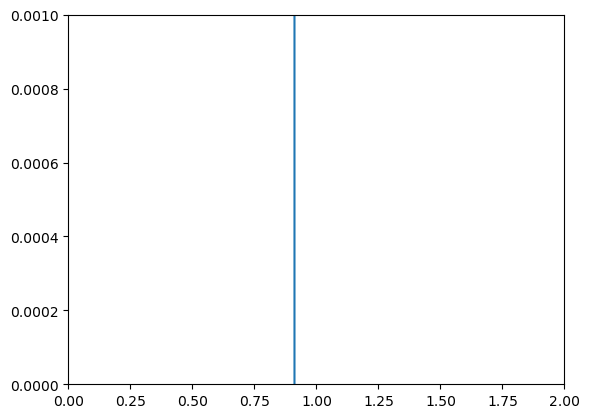

In [5]:
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
Bmat = material("GaAsP")(T=T, P=0.1, strained=True)
i_GaAs = material("GaAs")(T=T)
QW = PDD.QWunit(
    [
        Layer(width=10e-9, material=Bmat, role="barrier"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=7e-9, material=QWmat, role="well"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=10e-9, material=Bmat, role="barrier"),
    ],
    T=T,
    repeat=30, #สร้างมา30ชั้นเอาไว้กันฝน
    substrate=i_GaAs, #ใช้intrensic GaAs เป็นฐาน
)
QW_list = QW.GetEffectiveQW(wavelengths=wl)
# for i in QW_list:
#     print(i)
GaAs_junction = Junction(
      [Layer(width=150e-9, material=n_GaAs, role="Emitter"),]
    # Comment the following line to remove the QWs
    + QW_list
    + [Layer(width=2000e-9, material=p_GaAs, role="Base"),],
    sn=1e6,
    sp=1e6,
    T=T,
    kind="PDD",)
MgF2 = material("MgF2")()
ZnS = material("ZnScub")()
my_solar_cell3 = SolarCell(
    [
        Layer(width=110e-9, material=MgF2, role="ARC1"),
        Layer(width=60e-9, material=ZnS, role="ARC2"),
        GaAs_junction,
    ],
    T=T,
    substrate=n_GaAs,
)
solar_cell_solver(my_solar_cell3,"qe",
                  user_options={"light_source": light_source,
                                "wavelength": wl,
                                "optics_method": "TMM",
                                },)
vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-3.5, 0, 300)

solar_cell_solver(
    my_solar_cell3,#วัสดุ
    "iv",#วัดIV
    user_options={
        "light_source": light_source,
        "wavelength": wl,
        "optics_method": None,#ไม่คำนึงถึงการตกกระทบทางแสงหรือเข้า100%ไม่แน่ใจ
        "light_iv": True,#ให่IV ออกมา
        "mpp": True,#ให้Mppออกมา
        "voltages": V,#ให้Vออกมา
        "internal_voltages": vint,#ไม่แน่ใจอะไรคือVintเป็นbulid in หรือป่าวเท้าที่เห็นเป็นVoc
    },
)
plt.plot(-V, my_solar_cell3.iv["IV"][1]/1e2, label='test1')
plt.xlim(0,2)
plt.ylim(0,1e-3)


Solving QW properties...
Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
...done!

Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
Processing structure...
...done!

Solving equilibrium...
...done!
...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


C:\Users\usuwa\anaconda3\Lib\site-packages\solcore\analytic_solar_cells\IV.py:110: RuntimeWarning: invalid value encountered in scalar divide
  FF = Pmpp / (Isc * Voc)


(0.0, 0.001)

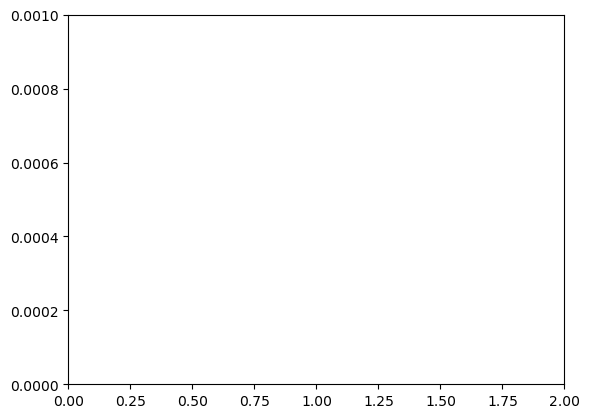

In [6]:
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
Bmat = material("GaAsP")(T=T, P=0.1, strained=True)
i_GaAs = material("GaAs")(T=T)
QW = PDD.QWunit(
    [
        Layer(width=10e-9, material=Bmat, role="barrier"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=7e-9, material=QWmat, role="well"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=10e-9, material=Bmat, role="barrier"),
    ],
    T=T,
    repeat=40, #สร้างมา30ชั้นเอาไว้กันฝน
    substrate=i_GaAs, #ใช้intrensic GaAs เป็นฐาน
)
QW_list = QW.GetEffectiveQW(wavelengths=wl)
# for i in QW_list:
#     print(i)
GaAs_junction = Junction(
    [Layer(width=150e-9, material=n_GaAs, role="Emitter"),]
    # Comment the following line to remove the QWs
    + QW_list
    + [Layer(width=2000e-9, material=p_GaAs, role="Base"),],
    sn=1e6,
    sp=1e6,
    T=T,
    kind="PDD",)
MgF2 = material("MgF2")()
ZnS = material("ZnScub")()
my_solar_cell4 = SolarCell(
    [
        Layer(width=110e-9, material=MgF2, role="ARC1"),
        Layer(width=60e-9, material=ZnS, role="ARC2"),
        GaAs_junction,
    ],
    T=T,
    substrate=n_GaAs,
)
solar_cell_solver(my_solar_cell4,"qe",
                  user_options={"light_source": light_source,
                                "wavelength": wl,
                                "optics_method": "TMM",
                                },)
vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-3.5, 0, 300)

solar_cell_solver(
    my_solar_cell4,#วัสดุ
    "iv",#วัดIV
    user_options={
        "light_source": light_source,
        "wavelength": wl,
        "optics_method": None,#ไม่คำนึงถึงการตกกระทบทางแสงหรือเข้า100%ไม่แน่ใจ
        "light_iv": True,#ให่IV ออกมา
        "mpp": True,#ให้Mppออกมา
        "voltages": V,#ให้Vออกมา
        "internal_voltages": vint,#ไม่แน่ใจอะไรคือVintเป็นbulid in หรือป่าวเท้าที่เห็นเป็นVoc
    },
)
plt.plot(-V, my_solar_cell4.iv["IV"][1]/1e2, label='test1')
plt.xlim(0,2)
plt.ylim(0,1e-3)


In [ ]:
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
Bmat = material("GaAsP")(T=T, P=0.1, strained=True)
i_GaAs = material("GaAs")(T=T)
QW = PDD.QWunit(
    [
        Layer(width=10e-9, material=Bmat, role="barrier"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=7e-9, material=QWmat, role="well"),
        Layer(width=2e-9, material=i_GaAs, role="well"),
        Layer(width=10e-9, material=Bmat, role="barrier"),
    ],
    T=T,
    repeat=50, #สร้างมา30ชั้นเอาไว้กันฝน
    substrate=i_GaAs, #ใช้intrensic GaAs เป็นฐาน
)
QW_list = QW.GetEffectiveQW(wavelengths=wl)
# for i in QW_list:
#     print(i)
GaAs_junction = Junction(
    [Layer(width=150e-9, material=n_GaAs, role="Emitter"),]
    # Comment the following line to remove the QWs
    + QW_list
    + [Layer(width=2000e-9, material=p_GaAs, role="Base"),],
    sn=1e6,
    sp=1e6,
    T=T,
    kind="PDD",)
MgF2 = material("MgF2")()
ZnS = material("ZnScub")()
my_solar_cell5 = SolarCell(
    [
        Layer(width=110e-9, material=MgF2, role="ARC1"),
        Layer(width=60e-9, material=ZnS, role="ARC2"),
        GaAs_junction,
    ],
    T=T,
    substrate=n_GaAs,
)
solar_cell_solver(my_solar_cell5,"qe",
                  user_options={"light_source": light_source,
                                "wavelength": wl,
                                "optics_method": "TMM",
                                },)
vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-3.5, 0, 300)

solar_cell_solver(
    my_solar_cell5,#วัสดุ
    "iv",#วัดIV
    user_options={
        "light_source": light_source,
        "wavelength": wl,
        "optics_method": None,#ไม่คำนึงถึงการตกกระทบทางแสงหรือเข้า100%ไม่แน่ใจ
        "light_iv": True,#ให่IV ออกมา
        "mpp": True,#ให้Mppออกมา
        "voltages": V,#ให้Vออกมา
        "internal_voltages": vint,#ไม่แน่ใจอะไรคือVintเป็นbulid in หรือป่าวเท้าที่เห็นเป็นVoc
    },
)
plt.plot(-V, my_solar_cell5.iv["IV"][1]/1e2, label='test1')
plt.xlim(0,2)
plt.ylim(0,1e-3)


Solving QW properties...
Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!
...done!

Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!


create c:\Users\usuwa\PycharmProjects\Solarcell\solar_testlab\data_of_dot_width1.00e-09 folder 
save success


'c:\\Users\\usuwa\\PycharmProjects\\Solarcell\\solar_testlab\\data_of_dot_width1.00e-09\\EQE_QW_1.00e-09_width.svg'

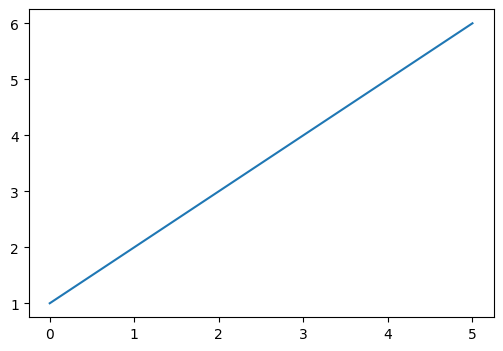

In [7]:
def create_folder(create_folder):
    import os
    current_path = os.getcwd()
    # print(current_path)
    current_path = os.path.join(current_path, create_folder) 
    print(current_path)
    if not os.path.exists(create_folder):
        os.makedirs(create_folder)
        print('create folder success')
def save_tuple2text(text, name,*data): #each data ==> tuple(name, detail)
    text += name + 'Custum text version' + '\n'
    text += "===============================START======================================= \n"
    for i in data:
        text += str(i[0])+ ': \n'
        text += str(i[1])+ '\n'
    text += "================================END======================================= \n"
    return text # note data topic and keyword
def save_full_solar_cells(text, solar_cells, name_solar):
    
    text += name_solar +'Full text version' + '\n'
    text += "===============================START======================================= \n"
    for i in solar_cells:
        text += str(i)+ '\n'
    text += "================================END======================================= \n"
    return text 
def save_file_direction(save_folder, text, name_text): #find from current file
    import os
    current_path = os.getcwd()
    current_path = os.path.join(current_path, save_folder)
    if not os.path.exists(current_path):
            os.makedirs(current_path)
            print(f'create {current_path} folder ')
    complete_Name = os.path.join(current_path, name_text+".txt")
    file1 = open(complete_Name, "w")
    toFile = text
    file1.write(toFile)
    file1.close()
    print('save success')
import os
import shutil
import matplotlib.pyplot as plt
fig3, axIV = plt.subplots(1, 1, figsize=(6, 4))

axIV.plot([1,2,3,4,5,6])
dot = 1e-9
fig3.savefig(f'EQE_QW_{dot:.2e}_width.svg', dpi=300)
data = 'heyyo'
save_file_direction(f'data_of_dot_width{dot:.2e}', data, f'QWcapping_width{dot:.2e}')
current_path = os.getcwd()
save_path = os.path.join(current_path, f'data_of_dot_width{dot:.2e}')
fig1_loc = os.path.join(current_path, f'EQE_QW_{dot:.2e}_width.svg')
fig1_loc_new = os.path.join(save_path, f'EQE_QW_{dot:.2e}_width.svg')
shutil.move(fig1_loc, fig1_loc_new)
# solar_text = save_full_solar_cells('',my_solar_cell,'test_solar')
# save_file_direction('test_folder', solar_text, 'test1')

In [1]:
print(f'hi{2e-9:.2e}')

hi2.00e-09


In [28]:
for i in my_solar_cell.__dict__:
    print(i)
my_solar_cell.sort_layer_type()

labels
T
cell_area
shading
reflectivity
junctions
junction_indices
tunnel_indices
substrate
incidence
R_series
width
reflected
absorbed
transmitted
iv


In [21]:
test_QW1 = PDD.QWunit( 
    [Layer(width=si("5nm"), material=barrier), 
     Layer(width=si("7nm"), material=QW), 
     Layer(width=si("5nm"), material=barrier)],
    repeat = 10,substrate=bulk,T=293)
test_QW11 = test_QW1.GetEffectiveQW(wavelengths=wl)
solar_cell1 = SolarCell([
    Junction(
        [Layer(width=150e-9, material=p_GaAs, role='window'),
         Layer(width=si("30nm"), material=barrier),]+
         test_QW1+
         [Layer(width=si("30nm"), material=barrier),
         Layer(width=500e-9, material=n_GaAs)],sn=1e6,sp=1e6,T=293, kind='PDD')],
    substrate=p_GaAs,T= 293)
solar_cell_solver(solar_cell1,"qe",user_options={"light_source": light_source,"wavelength": wl,"optics_method": "TMM",},)
vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-3.5, 0, 300)
solar_cell_solver(solar_cell1,"iv",user_options={"light_source": light_source,"wavelength": wl,"optics_method": None,"light_iv": True,"mpp": True,"voltages": V,"internal_voltages": vint,},)
plt.plot(-V, solar_cell1.iv["IV"][1]/1e-2, label='test1')


Solving QW properties...


RuntimeError: Optimal parameters not found: gtol=0.000000 is too small, func(x) is orthogonal to the columns of
  the Jacobian to machine precision.

In [3]:
test_QW2 = PDD.QWunit( [Layer(width=si("5nm"), material=barrier), Layer(width=si("7nm"), material=QW), Layer(width=si("5nm"), material=barrier)],repeat = 20,substrate=bulk,T=293)
test_QW3 = PDD.QWunit( [Layer(width=si("5nm"), material=barrier), Layer(width=si("7nm"), material=QW), Layer(width=si("5nm"), material=barrier)],repeat = 30,substrate=bulk,T=293)
test_QW4 = PDD.QWunit( [Layer(width=si("5nm"), material=barrier), Layer(width=si("7nm"), material=QW), Layer(width=si("5nm"), material=barrier)],repeat = 40,substrate=bulk,T=293)
test_QW5 = PDD.QWunit( [Layer(width=si("5nm"), material=barrier), Layer(width=si("7nm"), material=QW), Layer(width=si("5nm"), material=barrier)],repeat = 50,substrate=bulk,T=293)
test_QW21 = test_QW2.GetEffectiveQW(wavelengths=wl)
test_QW31 = test_QW3.GetEffectiveQW(wavelengths=wl)
test_QW41 = test_QW4.GetEffectiveQW(wavelengths=wl)
test_QW51 = test_QW5.GetEffectiveQW(wavelengths=wl)

Solving QW properties...


C:\Users\usuwa\anaconda3\Lib\site-packages\solcore\absorption_calculator\absorption_QW.py:70: RuntimeWarning: divide by zero encountered in scalar divide
  DOS_2D = mr / (np.pi * hbar ** 2 * well_width)
C:\Users\usuwa\anaconda3\Lib\site-packages\solcore\absorption_calculator\absorption_QW.py:98: RuntimeWarning: divide by zero encountered in scalar divide
  DOS_2D = mr / (np.pi * hbar ** 2 * well_width)
C:\Users\usuwa\anaconda3\Lib\site-packages\solcore\absorption_calculator\absorption_QW.py:137: RuntimeWarning: divide by zero encountered in scalar divide
  DOS_2D = mr / (np.pi * hbar ** 2 * well_width)
C:\Users\usuwa\anaconda3\Lib\site-packages\solcore\absorption_calculator\absorption_QW.py:155: RuntimeWarning: invalid value encountered in scalar multiply
  return C0 * Ieh * Mbsq_2D * DOS_2D * oscillator_strength * shape
C:\Users\usuwa\anaconda3\Lib\site-packages\solcore\absorption_calculator\absorption_QW.py:190: RuntimeWarning: divide by zero encountered in scalar divide
  DOS_2D = m

Solving QW properties...


RuntimeError: Optimal parameters not found: gtol=0.000000 is too small, func(x) is orthogonal to the columns of
  the Jacobian to machine precision.

In [ ]:
solar_cell2 = SolarCell([Junction([Layer(width=150e-9, material=p_GaAs, role='window'),Layer(width=si("30nm"), material=barrier),test_QW2,Layer(width=si("30nm"), material=barrier),Layer(width=500e-9, material=n_GaAs)],sn=1e6,sp=1e6,T=293, kind='PDD')],substrate=p_GaAs,T= 293)
solar_cell3 = SolarCell([Junction([Layer(width=150e-9, material=p_GaAs, role='window'),Layer(width=si("30nm"), material=barrier),test_QW3,Layer(width=si("30nm"), material=barrier),Layer(width=500e-9, material=n_GaAs)],sn=1e6,sp=1e6,T=293, kind='PDD')],substrate=p_GaAs,T= 293)
solar_cell4 = SolarCell([Junction([Layer(width=150e-9, material=p_GaAs, role='window'),Layer(width=si("30nm"), material=barrier),test_QW4,Layer(width=si("30nm"), material=barrier),Layer(width=500e-9, material=n_GaAs)],sn=1e6,sp=1e6,T=293, kind='PDD')],substrate=p_GaAs,T= 293)
solar_cell5 = SolarCell([Junction([Layer(width=150e-9, material=p_GaAs, role='window'),Layer(width=si("30nm"), material=barrier),test_QW5,Layer(width=si("30nm"), material=barrier),Layer(width=500e-9, material=n_GaAs)],sn=1e6,sp=1e6,T=293, kind='PDD')],substrate=p_GaAs,T= 293)








In [32]:
solar_cell_solver(solar_cell2,"qe",user_options={"light_source": light_source,"wavelength": wl,"optics_method": "TMM",},)
solar_cell_solver(solar_cell3,"qe",user_options={"light_source": light_source,"wavelength": wl,"optics_method": "TMM",},)
solar_cell_solver(solar_cell4,"qe",user_options={"light_source": light_source,"wavelength": wl,"optics_method": "TMM",},)
solar_cell_solver(solar_cell5,"qe",user_options={"light_source": light_source,"wavelength": wl,"optics_method": "TMM",},)


Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!
...done!



KeyboardInterrupt



In [23]:
vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-3.5, 0, 300)

solar_cell_solver(solar_cell2,"iv",user_options={"light_source": light_source,"wavelength": wl,"optics_method": None,"light_iv": True,"mpp": True,"voltages": V,"internal_voltages": vint,},)
solar_cell_solver(solar_cell3,"iv",user_options={"light_source": light_source,"wavelength": wl,"optics_method": None,"light_iv": True,"mpp": True,"voltages": V,"internal_voltages": vint,},)
solar_cell_solver(solar_cell4,"iv",user_options={"light_source": light_source,"wavelength": wl,"optics_method": None,"light_iv": True,"mpp": True,"voltages": V,"internal_voltages": vint,},)
solar_cell_solver(solar_cell5,"iv",user_options={"light_source": light_source,"wavelength": wl,"optics_method": None,"light_iv": True,"mpp": True,"voltages": V,"internal_voltages": vint,},)
plt.plot(-V, solar_cell2.ic["IV"][1]/1e-2, label='test2')
plt.plot(-V, solar_cell3.ic["IV"][1]/1e-2, label='test3')
plt.plot(-V, solar_cell4.ic["IV"][1]/1e-2, label='test4')
plt.plot(-V, solar_cell5.ic["IV"][1]/1e-2, label='test5')


TypeError: unsupported operand type(s) for +=: 'float' and 'method'

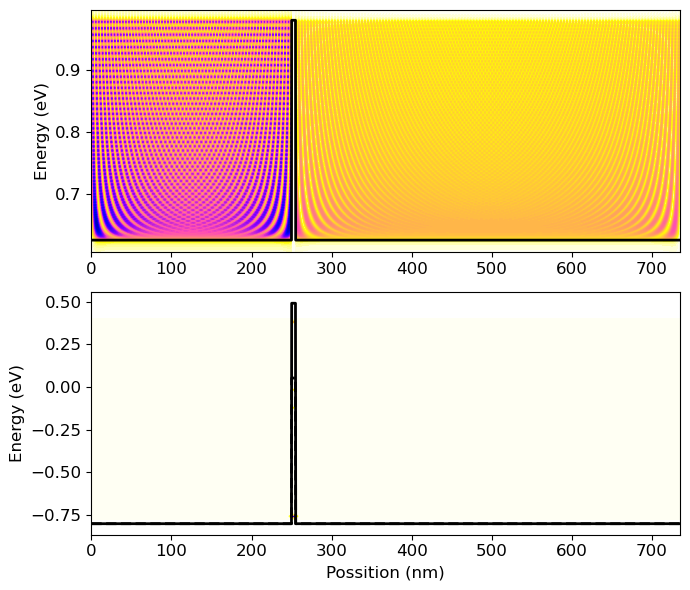

In [4]:
# outputtest1 = QM.schrodinger(test_ver1, quasiconfined=0, graphtype='potentials', num_eigenvalues=20,show=True)
# outputtest2 = QM.schrodinger(test_ver2, quasiconfined=0, graphtype='potentialsLDOS', num_eigenvalues=200,show=True)
# 
# And the layer


# The following lines create the QW structure, with different number of QWs and interlayers. Indicating the substrate
# material with the keyword "substrate" is essential in order to calculate correctly the strain.

# A single QW with interlayers
# test_structure_1 = Structure([top_layer, inter, well_layer, inter, bottom_layer], substrate=bulk)
# output_1 = QM.schrodinger(test_structure_1, quasiconfined=0, graphtype='potentials', num_eigenvalues=20, show=True)
# output_1 = QM.schrodinger(test_structure_1, quasiconfined=0, graphtype='potentialsLDOS', num_eigenvalues=20, show=True)
# 10 QWs without interlayers
test_structure_2 = Structure([top_layer, barrier_layer] + 10 * [well_layer, barrier_layer] + [bottom_layer], substrate=bulk)

# output_2 = QM.schrodinger(test_structure_2, quasiconfined=0.05, graphtype='potentialsLDOS', num_eigenvalues=200,show=True)


In [ ]:
Q